# Linear Regression

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

Построим распределение точек и отобразим их на графике.

In [5]:
count = 100

In [6]:
X = np.random.rand(count, 1)
y = 4 + 8 * X + np.random.randn(count, 1)

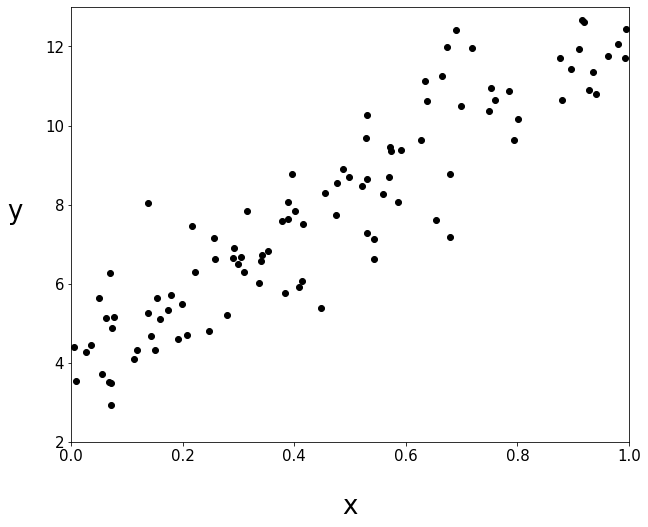

In [7]:
plt.figure(figsize=(10, 8))
plt.scatter(X, y, c='k')
plt.xlabel('x', fontsize=26, labelpad=30)
plt.ylabel('y', fontsize=26, rotation=0, labelpad=30)
plt.axis([0, 1, 2, 13])
ax = plt.gca()
ax.tick_params(labelsize=15)
plt.show()

Чтобы аппроксимировать данные точки, необходимо найти параметры модели линейной регрессии. Это можно сделать с помощью **нормального уравнения**.

$\overline{\theta} = (X^TX)^{-1}X^Ty$

In [8]:
X_b = np.c_[np.ones((count, 1)), X]
thetas = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [9]:
thetas

array([[3.98040279],
       [8.48588355]])

Как можно видеть, это очень близко сходится с параметрами $\theta_0$ и $\theta_1$, равные 4 и 8 соответственно. Такое отклонение происходит из-за добавочного шума.

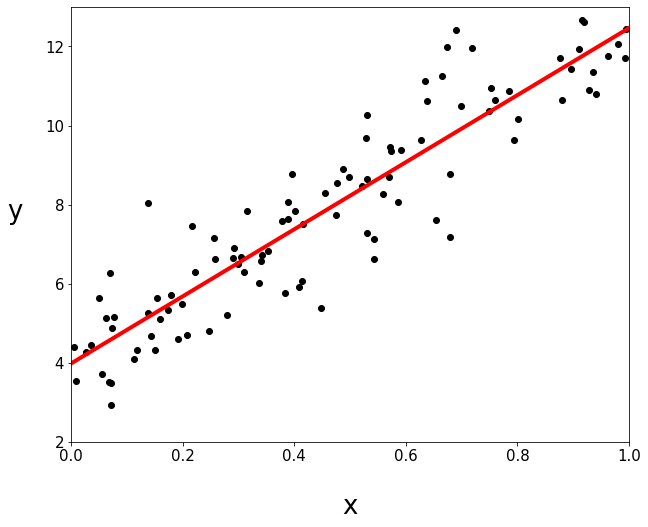

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(X, y, c='k')
plt.plot([[0], [1]], np.c_[np.ones((2, 1)), [[0],[1]]].dot(thetas), 'r', linewidth=4)
plt.xlabel('x', fontsize=26, labelpad=30)
plt.ylabel('y', fontsize=26, rotation=0, labelpad=30)
plt.axis([0, 1, 2, 13])
ax = plt.gca()
ax.tick_params(labelsize=15)
plt.show()

Давайте посмотрим, что выдаст обученная модель линейной регрессии из Sklearn.

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
reg = LinearRegression()
reg.fit(X, y)
reg.intercept_, reg.coef_

(array([3.98040279]), array([[8.48588355]]))

Как можно заметить, результаты практически полностью совпадают. Опять же, смещение происходит только из-за шума в самих данных.

# Градиентный спуск

Самый основной смысл градиентного спуска - это с помощью градиента функции потерь отыскать оптимальные параметры, минимизирующие функцию потерь. Т.е. такие параметры, при подстановке которых в модель, функция потерь будет иметь минимальное значение.

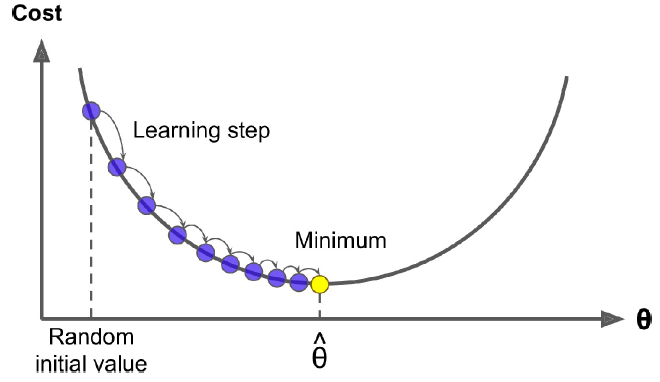

In [13]:
from IPython.display import Image
Image(data="./convergence.png")

Первым шагом вы инициализируете веса случайным образом (это называется **случайная инициализация**). Затем вы последовательно, шаг за шагом пытаетесь уменьшить функцию потерь до тех пор, пока алгоритм не сойдётся в минимуме.

In [15]:
thetas = np.random.randn(2, 1)
thetas

array([[ 0.20379409],
       [-0.78718721]])

Напишем функцию, реализующую градиентный спуск и проверим её результаты

In [23]:
def gradient_descent(n_iters, lr, thetas=None):
    if thetas is None:
        thetas = np.random.randn(2, 1)

    for n_iter in range(n_iters):
        grads = 2/count * X_b.T.dot(X_b.dot(thetas) - y)
        thetas = thetas - lr * grads
        
    return thetas

In [29]:
gradient_descent(10000, 0.01)

array([[3.98040747],
       [8.48587386]])

Важным параметром в градиентом спуске является **скорость обучения (learning rate)**. Если скорость обучения слишком маленькая, то алгоритму придётся совершить большое количество итераций, пока он не сойдётся к минимуму.

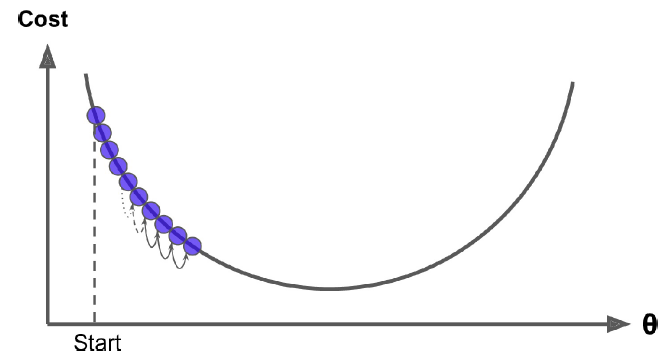

In [30]:
from IPython.display import Image
Image(data="./low_lr.png")

В противном случае, если скорость обучения слишком большая, то алгоритм будет как будто "перепрыгивать" точку минимума или вовсе начнёт расходиться.

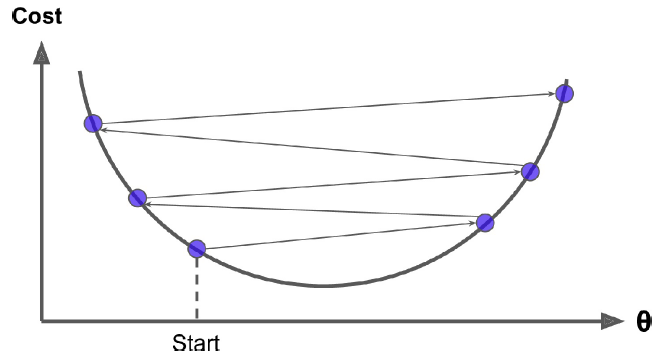

In [31]:
from IPython.display import Image
Image(data="./high_lr.png")

В конце концов, не все функции потерь являются выпуклыми. Могут быть совсем неровные функции с постоянными локальными минимумами. И в этом как раз заключается основная проблема - градиентный спуск может просто сойтись в локальный минимум, так и не отыскав глобальный. 

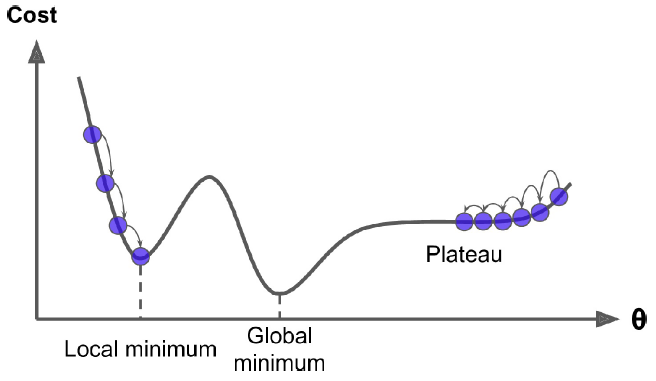

In [32]:
from IPython.display import Image
Image(data="./cost_func.png")

# Пакетный градиентный спуск

Чтобы реализовать градиентный спуск, необходимо вычислить градиент функции потерь для каждого параметра модели $\theta_j$. Другими словами, необходимо вычислить то, насколько сильно изменится функция потерь при небольшом изменении параметра $\theta_j$. Иначе это называется **частной производной**.

$\frac\delta{\delta\theta_j}MSE(\theta)=\frac2m\sum_{i=1}^{m}(\theta^Tx^{(i)}-y^{(i)})x^{(i)}_j$

Чтобы не вычислять каждую производную в отдельности, пользуются матричными операциями, такими же, какие мы применили до этого: `grads = 2/count * X_b.T.dot(X_b.dot(thetas) - y)`

$\theta^{(следующий)}=\theta - \eta\bigtriangledown_\theta MSE(\theta)$